<a href="https://colab.research.google.com/github/SandeepaDevin/videoGameAnalysis/blob/main/video_game_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


First Step : Import the data csv file and visualize dataframe 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

newdataframe = pd.read_csv('vgsales.csv')

In [10]:
newdataframe.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
newdataframe.shape

(16598, 11)

In [12]:
drop_row_index = newdataframe[newdataframe['Year'] > 2015].index
newdataframe = newdataframe.drop(drop_row_index)

In [13]:
newdataframe.shape

(16250, 11)

In [14]:
newdataframe.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
newdataframe.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Step 2 : Obtain Value count for each category columns

In [16]:
newdataframe['Year'].value_counts(ascending=False).head(5)

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: Year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

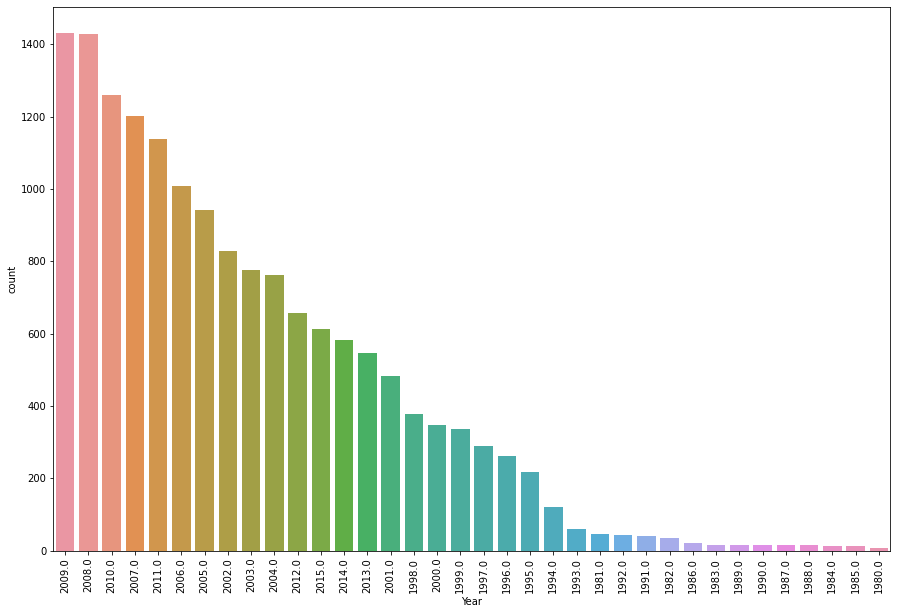

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=newdataframe, order = newdataframe['Year'].value_counts().index)
plt.xticks(rotation=90)

In [19]:
newdataframe['Genre'].value_counts().head(8)

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

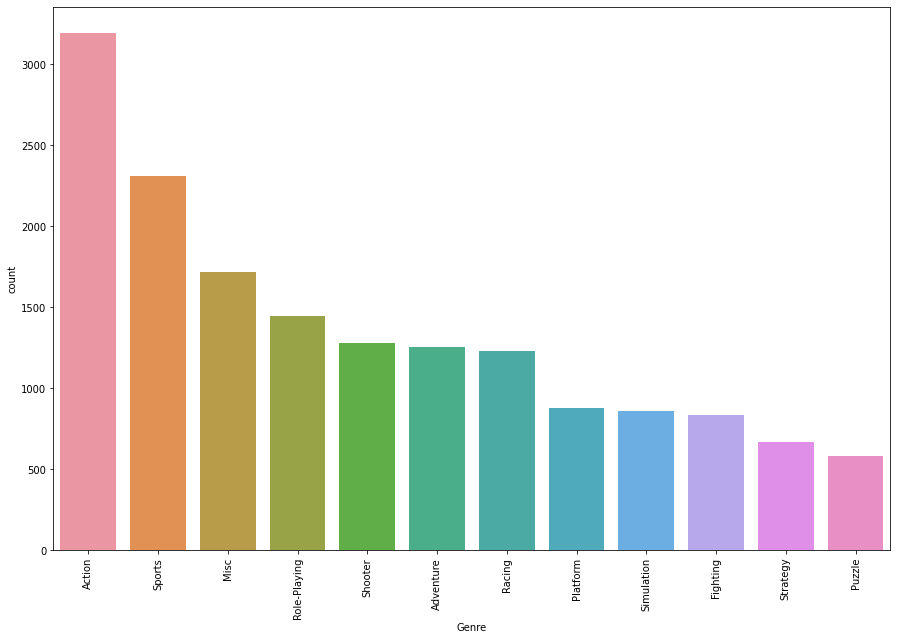

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=newdataframe, order = newdataframe['Genre'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

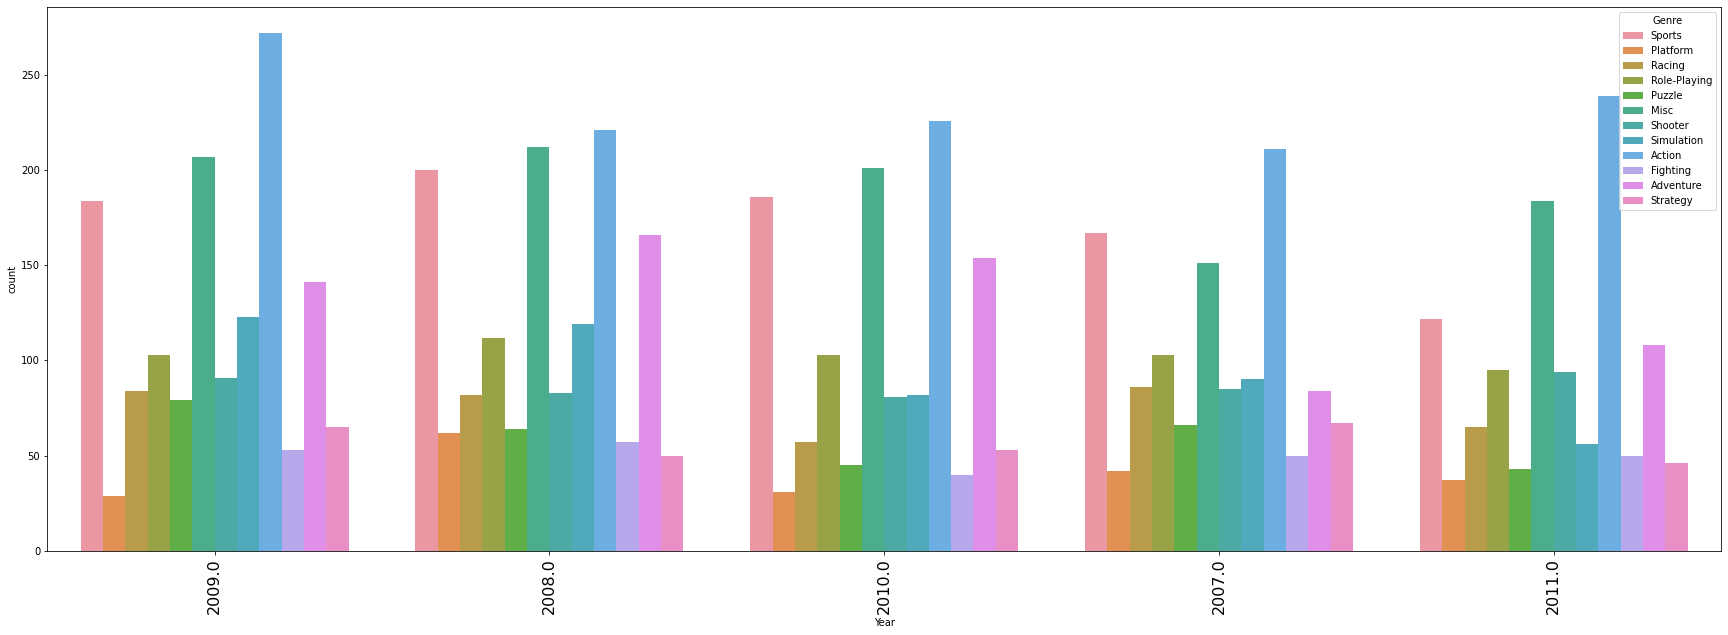

In [21]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=newdataframe, hue='Genre', order=newdataframe.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

In [22]:
newdataframe['Platform'].value_counts().head(8)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
Name: Platform, dtype: int64

In [23]:
newdataframe['Publisher'].value_counts().head(8)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Name: Publisher, dtype: int64

Step 03 : Calculate different type sales for each publisher, platform and genre

In [27]:
publisher_sales = newdataframe.groupby(by="Publisher")["Global_Sales"].sum()
publisher_sales.sort_values(ascending=False).head(8)

Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Name: Global_Sales, dtype: float64

In [28]:
genre_sales = newdataframe.groupby(by="Genre")["Global_Sales"].sum()
genre_sales.sort_values(ascending=False).head(8)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Name: Global_Sales, dtype: float64

In [29]:
platform_sales = newdataframe.groupby(by="Platform")["Global_Sales"].sum().reset_index()
platform_sales = platform_sales.sort_values(ascending=False,by='Global_Sales')
platform_sales.head(8)

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.13
17,PS3,955.25
26,Wii,926.71
4,DS,822.20
15,PS,730.66
6,GBA,318.50
19,PSP,296.28


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

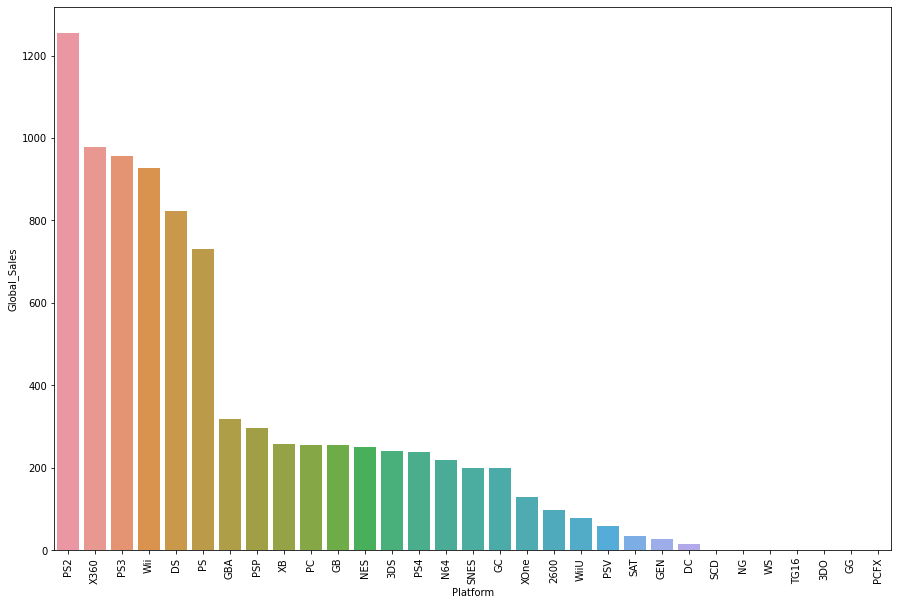

In [30]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=platform_sales)
plt.xticks(rotation=90)

In [ ]:
publisher_nasales = newdataframe.groupby(by="Publisher")["NA_Sales"].sum()
publisher_nasales.sort_values(ascending=False).head(8)

In [ ]:
genre_nasales = newdataframe.groupby(by="Genre")["NA_Sales"].sum()
genre_nasales.sort_values(ascending=False).head(8)

In [ ]:
platform_nasales = newdataframe.groupby(by="Platform")["NA_Sales"].sum()
platform_nasales.sort_values(ascending=False).head(8)

In [24]:
year_nasales = newdataframe.groupby(by="Year")["NA_Sales"].sum()
year_eusales = newdataframe.groupby(by="Year")["EU_Sales"].sum()
year_glosales = newdataframe.groupby(by="Year")["Global_Sales"].sum()
result = pd.concat([year_nasales, year_eusales,year_glosales], axis=1).reset_index()
result.head(8)

,Year,NA_Sales,EU_Sales,Global_Sales
0,1980.0,10.59,0.67,11.38
1,1981.0,33.40,1.96,35.77
2,1982.0,26.92,1.65,28.86
3,1983.0,7.76,0.80,16.79
4,1984.0,33.28,2.10,50.36
5,1985.0,33.73,4.74,53.94
6,1986.0,12.50,2.84,37.07
7,1987.0,8.46,1.41,21.74


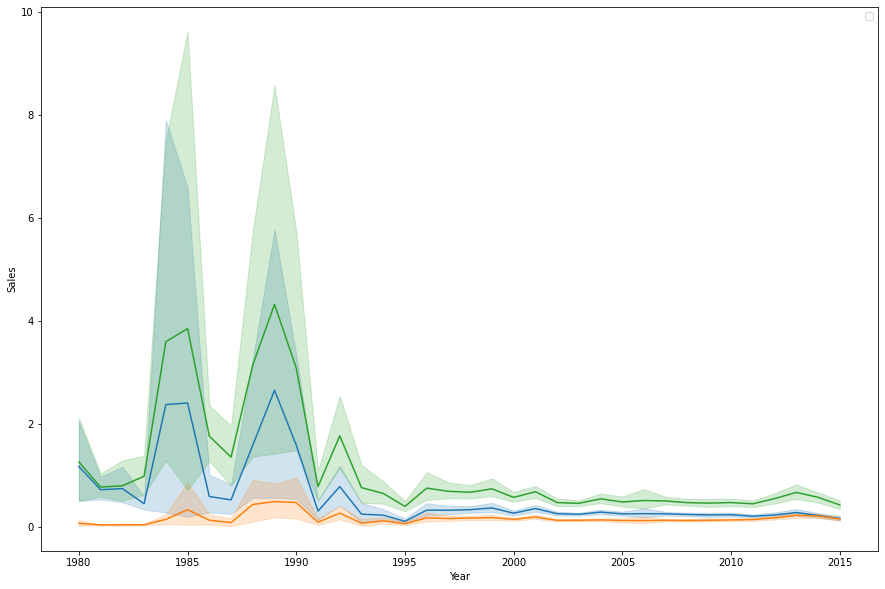

In [25]:
plt.figure(figsize=(15, 10))

sns.lineplot(x="Year", y="NA_Sales", data=newdataframe)
sns.lineplot(x="Year", y="EU_Sales", data=newdataframe)
sns.lineplot(x="Year", y="Global_Sales", data=newdataframe)

plt.ylabel("Sales")
plt.legend()
plt.show()

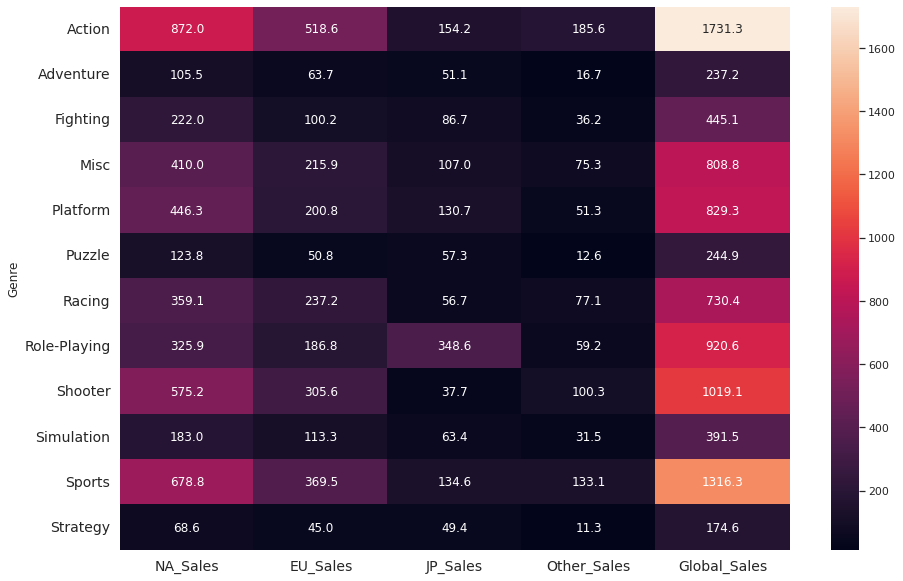

In [31]:
genre = newdataframe[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
map = genre.groupby(by=['Genre']).sum()

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

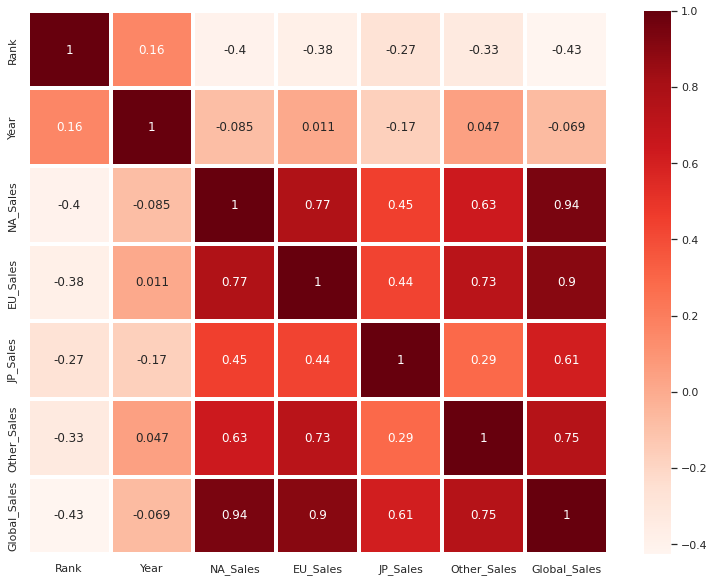

In [33]:
plt.figure(figsize=(13,10))
sns.heatmap(newdataframe.corr(), cmap = "Reds", annot=True, linewidth=3)